In [3]:
import pandas as pd
import numpy as np


In [4]:
df = pd.read_csv("./data/train.csv")

In [5]:
df 

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52
...,...,...,...,...,...,...,...,...,...
150145,212638,09/07/13,9984,223245,235.8375,235.8375,0,0,38
150146,212639,09/07/13,9984,223153,235.8375,235.8375,0,0,30
150147,212642,09/07/13,9984,245338,357.6750,483.7875,1,1,31
150148,212643,09/07/13,9984,547934,141.7875,191.6625,0,1,12


In [6]:
 df[["day", "month", "year"]] = df["week"].str.split("/", expand=True)

In [7]:
df = df.drop("week", axis=1)

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X, y = df.drop("units_sold", axis=1), df["units_sold"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [9]:
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train, y_train)


RandomForestRegressor(n_jobs=-1)

In [10]:
model.score(X_test, y_test)

0.7770639493647298

In [11]:
from sklearn.metrics import root_mean_squared_error

y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_pred, y_test)

rmse

27.0459111157045

In [12]:
df.units_sold.describe()

count    150150.000000
mean         51.674206
std          60.207904
min           1.000000
25%          20.000000
50%          35.000000
75%          62.000000
max        2876.000000
Name: units_sold, dtype: float64

<Axes: >

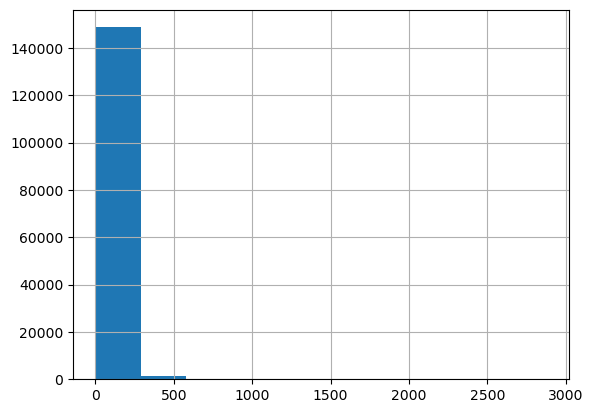

In [13]:
df.units_sold.hist()

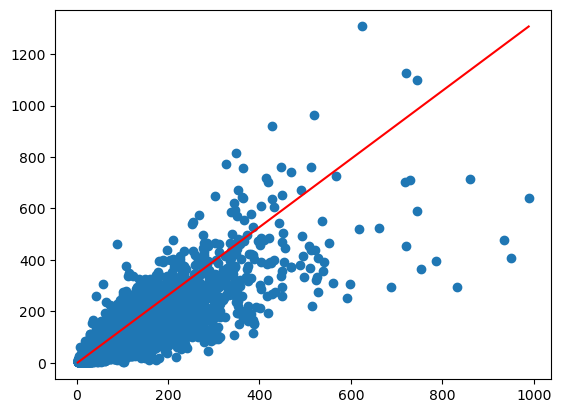

In [14]:
import matplotlib.pyplot as plt

plt.scatter(y_pred, y_test)
plt.plot(np.linspace(y_pred.min(), y_pred.max()), np.linspace(y_test.min(), y_test.max()), color="red")

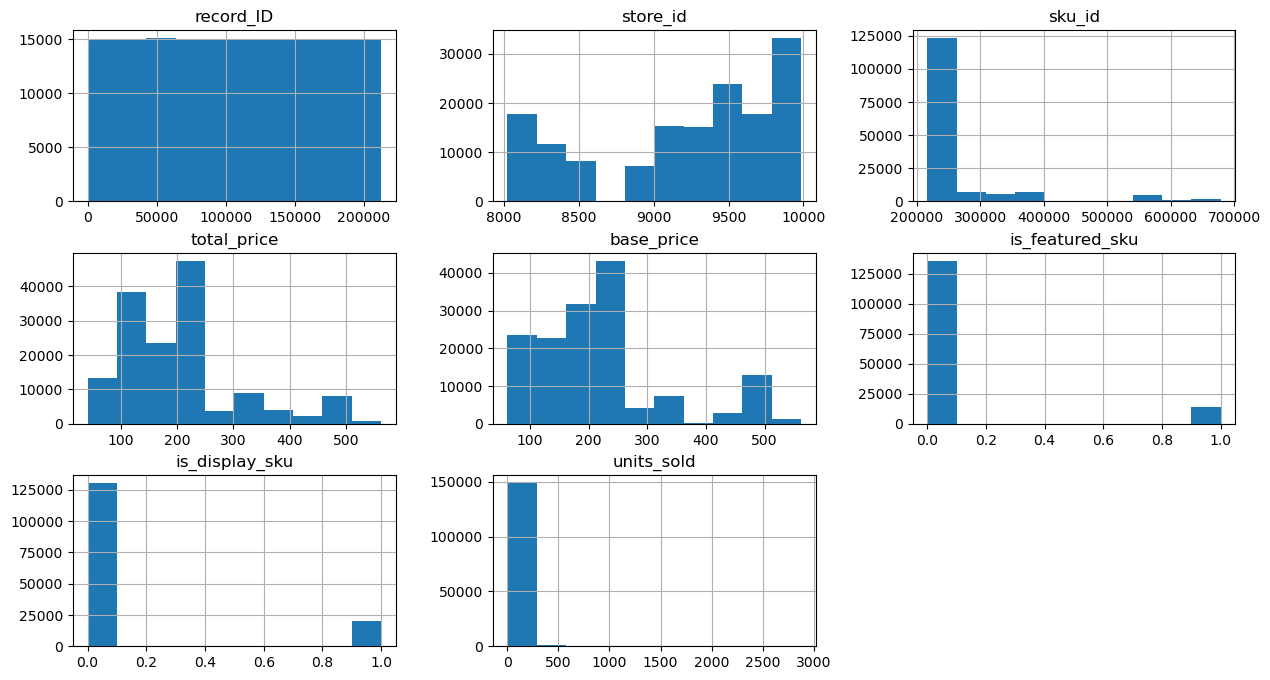

In [15]:
df.hist(figsize= (15, 8))
plt.show()

In [16]:
df = df.drop("record_ID", axis=1)

In [17]:
df 

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
0,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,8091,217390,141.0750,141.0750,0,0,52,17,01,11
...,...,...,...,...,...,...,...,...,...,...
150145,9984,223245,235.8375,235.8375,0,0,38,09,07,13
150146,9984,223153,235.8375,235.8375,0,0,30,09,07,13
150147,9984,245338,357.6750,483.7875,1,1,31,09,07,13
150148,9984,547934,141.7875,191.6625,0,1,12,09,07,13


In [18]:
len(df.store_id.unique())

76

In [19]:
len(df.sku_id.unique())

28

In [20]:
df = df[df.units_sold < df.units_sold.quantile(0.99)]

In [21]:
df

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
0,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,8091,217390,141.0750,141.0750,0,0,52,17,01,11
...,...,...,...,...,...,...,...,...,...,...
150145,9984,223245,235.8375,235.8375,0,0,38,09,07,13
150146,9984,223153,235.8375,235.8375,0,0,30,09,07,13
150147,9984,245338,357.6750,483.7875,1,1,31,09,07,13
150148,9984,547934,141.7875,191.6625,0,1,12,09,07,13


<Axes: >

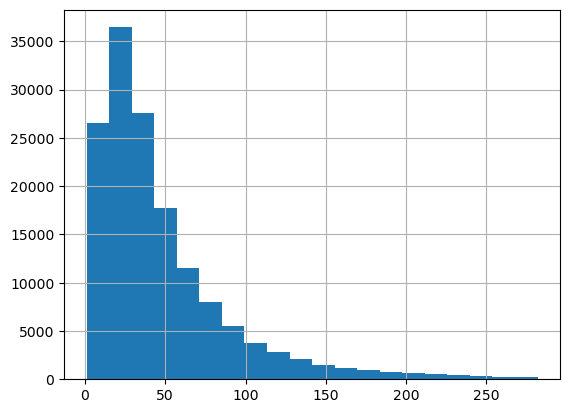

In [22]:
df.units_sold.hist(bins=20)

In [23]:
df = df.join(pd.get_dummies(df.store_id, prefix="store")).drop("store_id", axis=1)
df = df.join(pd.get_dummies(df.sku_id, prefix="item")).drop("sku_id", axis=1)

In [24]:
model = RandomForestRegressor(n_jobs=-1)
X, y = df.drop("units_sold", axis=1), df["units_sold"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [26]:
model.score(X_test, y_test)

0.8260481591234757

In [27]:
y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_pred, y_test)

rmse

17.80340682559621

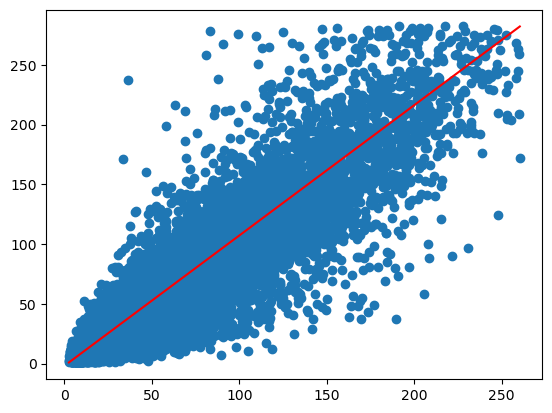

In [28]:
plt.scatter(y_pred, y_test)
plt.plot(np.linspace(y_pred.min(), y_pred.max()), np.linspace(y_test.min(), y_test.max()), color="red")

In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 20],
    'min_samples_split': [2,3]
   
}

model = RandomForestRegressor(n_jobs=1)

grid_search = GridSearchCV(model, param_grid, verbose=2, cv=3)

grid_search.fit(X, y)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ...............min_samples_split=2, n_estimators=10; total time=  10.9s
[CV] END ...............min_samples_split=2, n_estimators=10; total time=  11.6s
[CV] END ...............min_samples_split=2, n_estimators=10; total time=  11.8s
[CV] END ...............min_samples_split=2, n_estimators=20; total time=  45.9s
[CV] END ...............min_samples_split=2, n_estimators=20; total time=  39.7s
[CV] END ...............min_samples_split=2, n_estimators=20; total time=  28.9s
[CV] END ...............min_samples_split=3, n_estimators=10; total time=  11.6s
[CV] END ...............min_samples_split=3, n_estimators=10; total time=  12.0s
[CV] END ...............min_samples_split=3, n_estimators=10; total time=  12.2s
[CV] END ...............min_samples_split=3, n_estimators=20; total time=  23.0s
[CV] END ...............min_samples_split=3, n_estimators=20; total time=  21.3s
[CV] END ...............min_samples_split=3, n_es

GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=1),
             param_grid={'min_samples_split': [2, 3], 'n_estimators': [10, 20]},
             verbose=2)

In [30]:
best_model = grid_search.best_estimator_

In [31]:
grid_search.best_params_

{'min_samples_split': 2, 'n_estimators': 20}

In [32]:
best_model.score(X_test, y_test)

0.9723608488516613